# Fully Convolutional Networks for semantic segmentation

In an image for the semantic segmentation, each pixcel is labeled with the class of its enclosing object. The semantic segmentation problem requires to make a classification at every pixel.

First, download data from:

https://drive.google.com/file/d/0B0d9ZiqAgFkiOHR1NTJhWVJMNEU/view

and save the downloaded data folder in the current directory.

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Mar 29 04:27:32 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# !unzip '/content/drive/My Drive/dataset1.zip' -d '/content/drive/MyDrive/FCN8model'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


0006R0_f01410.png
seg.shape=(360, 480, 3), img_is.shape=(360, 480, 3)
minimum seg = 0, maximum seg = 11, Total number of segmentation classes = 12


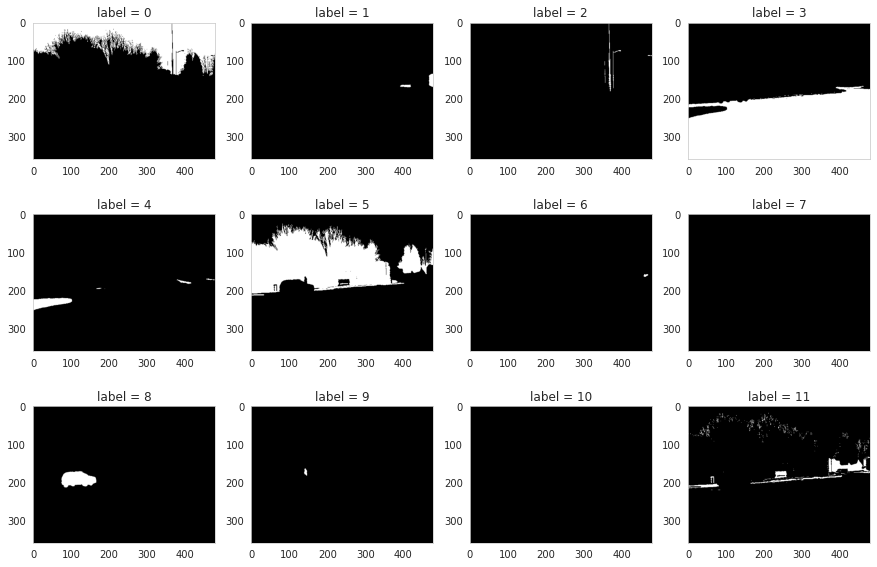

In [ ]:
import cv2, os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid", {'axes.grid' : False})

# enter your path here
dir_seg = "/content/drive/MyDrive/FCN8model/dataset1/annotations_prepped_train"  # annotations_prepped_train
dir_img = "/content/drive/MyDrive/FCN8model/dataset1/images_prepped_train"  # images_prepped_train

ldseg = np.array(os.listdir(dir_seg))

## pick the first image file
fnm = ldseg[0]
print(fnm)

## read in the original image and segmentation labels
## Read first image from annotations_prepped_train and images_prepped_train with path "dir_seg +"/"+ fnm"
'''
Your code here
'''
seg = cv2.imread(dir_seg +"/"+ fnm)   # image from annotations_prepped_train (360, 480, 3)
img_is = cv2.imread(dir_img +"/"+ fnm) # image from images_prepped_train
print("seg.shape={}, img_is.shape={}".format(seg.shape,img_is.shape))

## Check the number of labels
'''
Your code here
'''
mi, ma = np.min(seg), np.max(seg)
n_classes = ma + 1
print("minimum seg = {}, maximum seg = {}, Total number of segmentation classes = {}".format(mi,ma, n_classes))

# Plot original image from images_prepped_train image:
'''
Your code here
'''

# Plot all class from annotations_prepped_train image:
fig = plt.figure(figsize=(15,10))
for k in range(mi,ma+1):
    ax = fig.add_subplot(3,n_classes/3,k+1)
    ax.imshow((seg == k)*1.0)
    ax.set_title("label = {}".format(k))

plt.show()

From the first section, we can see there are 12 segmentation classes and the image is from a driving car.

Assign color to annotations_prepped_train image


(360, 480, 3)
(360, 480)
0.8287999999999999


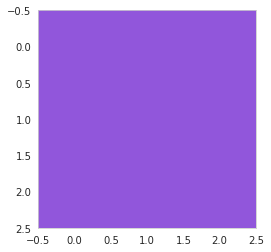

[[0.34 0.34 0.34]
 [0.34 0.34 0.34]
 [0.34 0.34 0.34]]


In [ ]:
import copy
colors = sns.color_palette("hls", n_classes)
print()
print(seg.shape)
seg_index = np.logical_and(seg >= 0, seg < 1) 
seg_01 = copy.copy(seg)
seg_01[seg_index] = 1
seg_01[np.logical_not(seg_index)] = 0
a = seg_01[:,:,1]
print(a.shape)
seg_imageRGB = np.zeros((seg.shape))
a = np.zeros((3,3,3))
print(colors[2][0])
a[:,:,0] = colors[11][0]
a[:,:,1] = colors[11][1]
a[:,:,2] = colors[11][2]
plt.imshow(a[:,:,[2,1,0]])
plt.show()
a0,a1,a2 = a[:,:,0],a[:,:,1],a[:,:,2]
print(a1)


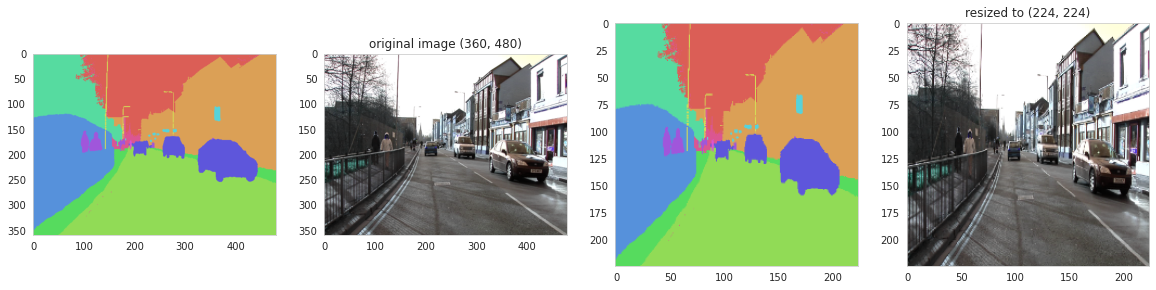

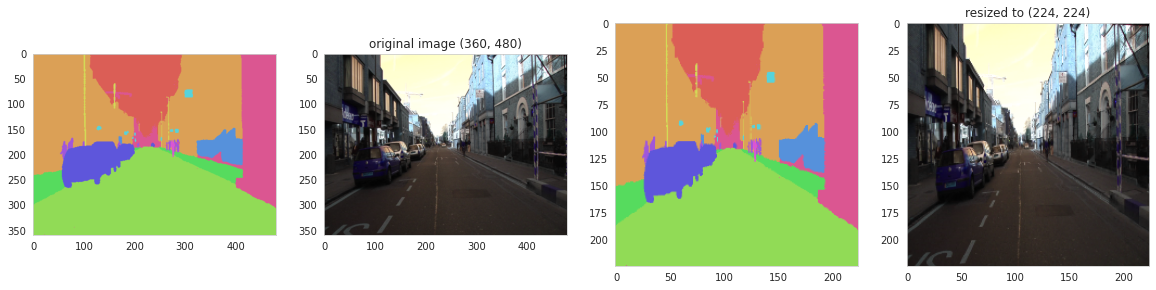

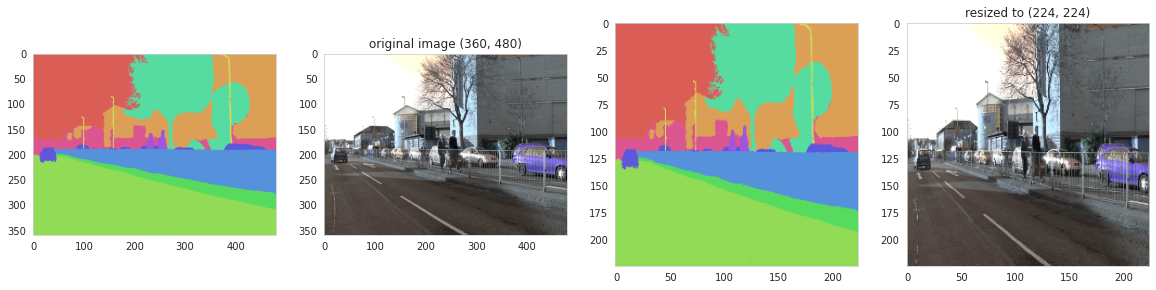

In [ ]:
import copy
import random
def give_color_to_seg_img(seg,n_classes):
    '''
    seg : size is (input_width,input_height,3)
    assign color to each class 
        You can use sns color palette to assign color pattern
        colors = sns.color_palette("hls", n_classes)
    '''
    '''
    Your code here
    '''
    # Choose a color palette
    colors = sns.color_palette("hls", n_classes)
    # Set up a blank array for colored image
    seg_imageRGB = np.zeros((seg.shape))
    # Set up comparaing benchmarks
    seg_part0 = seg[:,:,0]
    seg_part1 = seg[:,:,1]
    seg_part2 = seg[:,:,2]
    # Assign 12 colors
    for i in range(n_classes):
        seg_imageRGB[:,:,0][seg_part0 == i] = colors[i][0]
        seg_imageRGB[:,:,1][seg_part1 == i] = colors[i][1]
        seg_imageRGB[:,:,2][seg_part2 == i] = colors[i][2]

    seg_img = seg_imageRGB
    return(seg_img)

input_height , input_width = 224 , 224
output_height , output_width = 224 , 224


ldseg = np.array(os.listdir(dir_seg))
for fnm in ldseg[np.random.choice(len(ldseg),3,replace=False)]:
    # randomly select on the training image
    fnm = fnm.split(".")[0]
    seg = cv2.imread(dir_seg  +"/"+ fnm + ".png") # (360, 480, 3)
    img_is = cv2.imread(dir_img  +"/"+ fnm + ".png")
    # assign color to its annotations_prepped_train image
    seg_img = give_color_to_seg_img(seg,n_classes)

    fig = plt.figure(figsize=(20,40))
    ax = fig.add_subplot(1,4,1)
    ax.imshow(seg_img)
    
    ax = fig.add_subplot(1,4,2)
    ax.imshow(img_is/255.0)
    ax.set_title("original image {}".format(img_is.shape[:2]))
    
    ax = fig.add_subplot(1,4,3)
    ax.imshow(cv2.resize(seg_img,(input_height , input_width)))
    
    ax = fig.add_subplot(1,4,4)
    ax.imshow(cv2.resize(img_is,(output_height , output_width))/255.0)
    ax.set_title("resized to {}".format((output_height , output_width)))
    plt.show()

To simplify the problem, I will reshape all the images to the same size: (224,224). 

Since this is the iamge shape used in VGG and FCN model in this blog uses a network that takes advantage of VGG structure. The FCN model becomes easier to explain when the image shape is (224,224).

In [ ]:
def getImageArr( path , width , height ):
        img = cv2.imread(path, 1)
        img = np.float32(cv2.resize(img, ( width , height ))) / 127.5 - 1
        return img

def getSegmentationArr( path , nClasses ,  width , height  ):

    seg_labels = np.zeros((  height , width  , nClasses ))
    img = cv2.imread(path, 1)
    img = cv2.resize(img, ( width , height ))
    img = img[:, : , 0]

    for c in range(nClasses):
        seg_labels[: , : , c ] = (img == c ).astype(int)
    ##seg_labels = np.reshape(seg_labels, ( width*height,nClasses  ))
    return seg_labels


images = os.listdir(dir_img)
images.sort()
segmentations  = os.listdir(dir_seg)
segmentations.sort()
    
X = []
Y = []
for im , seg in zip(images,segmentations) :
    X.append( getImageArr(dir_img +"/"+ im , input_width , input_height )  )
    Y.append( getSegmentationArr( dir_seg +"/"+ seg , n_classes , output_width , output_height )  )

X, Y = np.array(X) , np.array(Y)
print(X.shape,Y.shape)

(367, 224, 224, 3) (367, 224, 224, 12)


Import Keras and Tensorflow to develop deep learning FCN models

In [ ]:
## Import usual libraries
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# from keras.backend.tensorflow_backend import set_session
from tensorflow.compat.v1.keras.backend import set_session
import keras, sys, time, warnings
from keras.models import *
from keras.layers import *
import pandas as pd 
warnings.filterwarnings("ignore")

###############################################

# check python, keras, and tensorflow version
print("python {}".format(sys.version))
print("keras version {}".format(keras.__version__)); del keras
print("tensorflow version {}".format(tf.__version__))

Instructions for updating:
non-resource variables are not supported in the long term
python 3.7.13 (default, Mar 16 2022, 17:37:17) 
[GCC 7.5.0]
keras version 2.8.0
tensorflow version 2.8.0


# From classifier to dense FCN
The recent successful deep learning models such as VGG are originally designed for classification task. The network stacks convolution layers together with down-sampling layers, such as max-pooling, and then finally stacks fully connected layers. Appending a fully connected layer enables the network to learn something using global information where the spatial arrangement of the input falls away.

# Fully convosutional network
For the segmentation task, however, spatial infomation should be stored to make a pixcel-wise classification. FCN allows this by making all the layers of VGG to convolusional layers.

Fully convolutional indicates that the neural network is composed of convolutional layers without any fully-connected layers usually found at the end of the network. Fully Convolutional Networks for Semantic Segmentation motivates the use of fully convolutional networks by "convolutionalizing" popular CNN architectures e.g. VGG can also be viewed as FCN.

The following method is FCN8 from Fully Convolutional Networks for Semantic Segmentation. It deplicates VGG16 net by discarding the final classifier layer and convert all fully connected layers to convolutions. Output image size is (output_height, output_width) = (224,224).

# Upsampling
The upsampling layer brings low resolution image to high resolution. There are various upsamping methods. This presentation gives a good overview. For example, one may double the image resolution by duplicating each pixcel twice. This is so-called nearest neighbor approach and implemented in Keras's UpSampling2D.

These upsampling layers do not have weights/parameters so the model is not flexible. Instead, FCN8 uses upsampling procedure called backwards convolusion (sometimes called deconvolution) with output stride. This method simply reverses the forward and backward passes of convolution and implemented in Keras's Conv2DTranspose.

In FCN8, the upsampling layer is followed by several skip connections. See details at Fully Convolutional Networks for Semantic Segmentation.

Downloaded VGG16 weights from fchollet's Github:  
https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

This is a massive .h5 file (57MB).

In [ ]:
# location of VGG weights
VGG_Weights_path = "/content/drive/MyDrive/FCN8model/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"

Cited from https://xilinx.github.io/Vitis-Tutorials/2020-2/docs/Machine_Learning/Design_Tutorials/05-Keras_FCN8_UNET_segmentation/README.html:

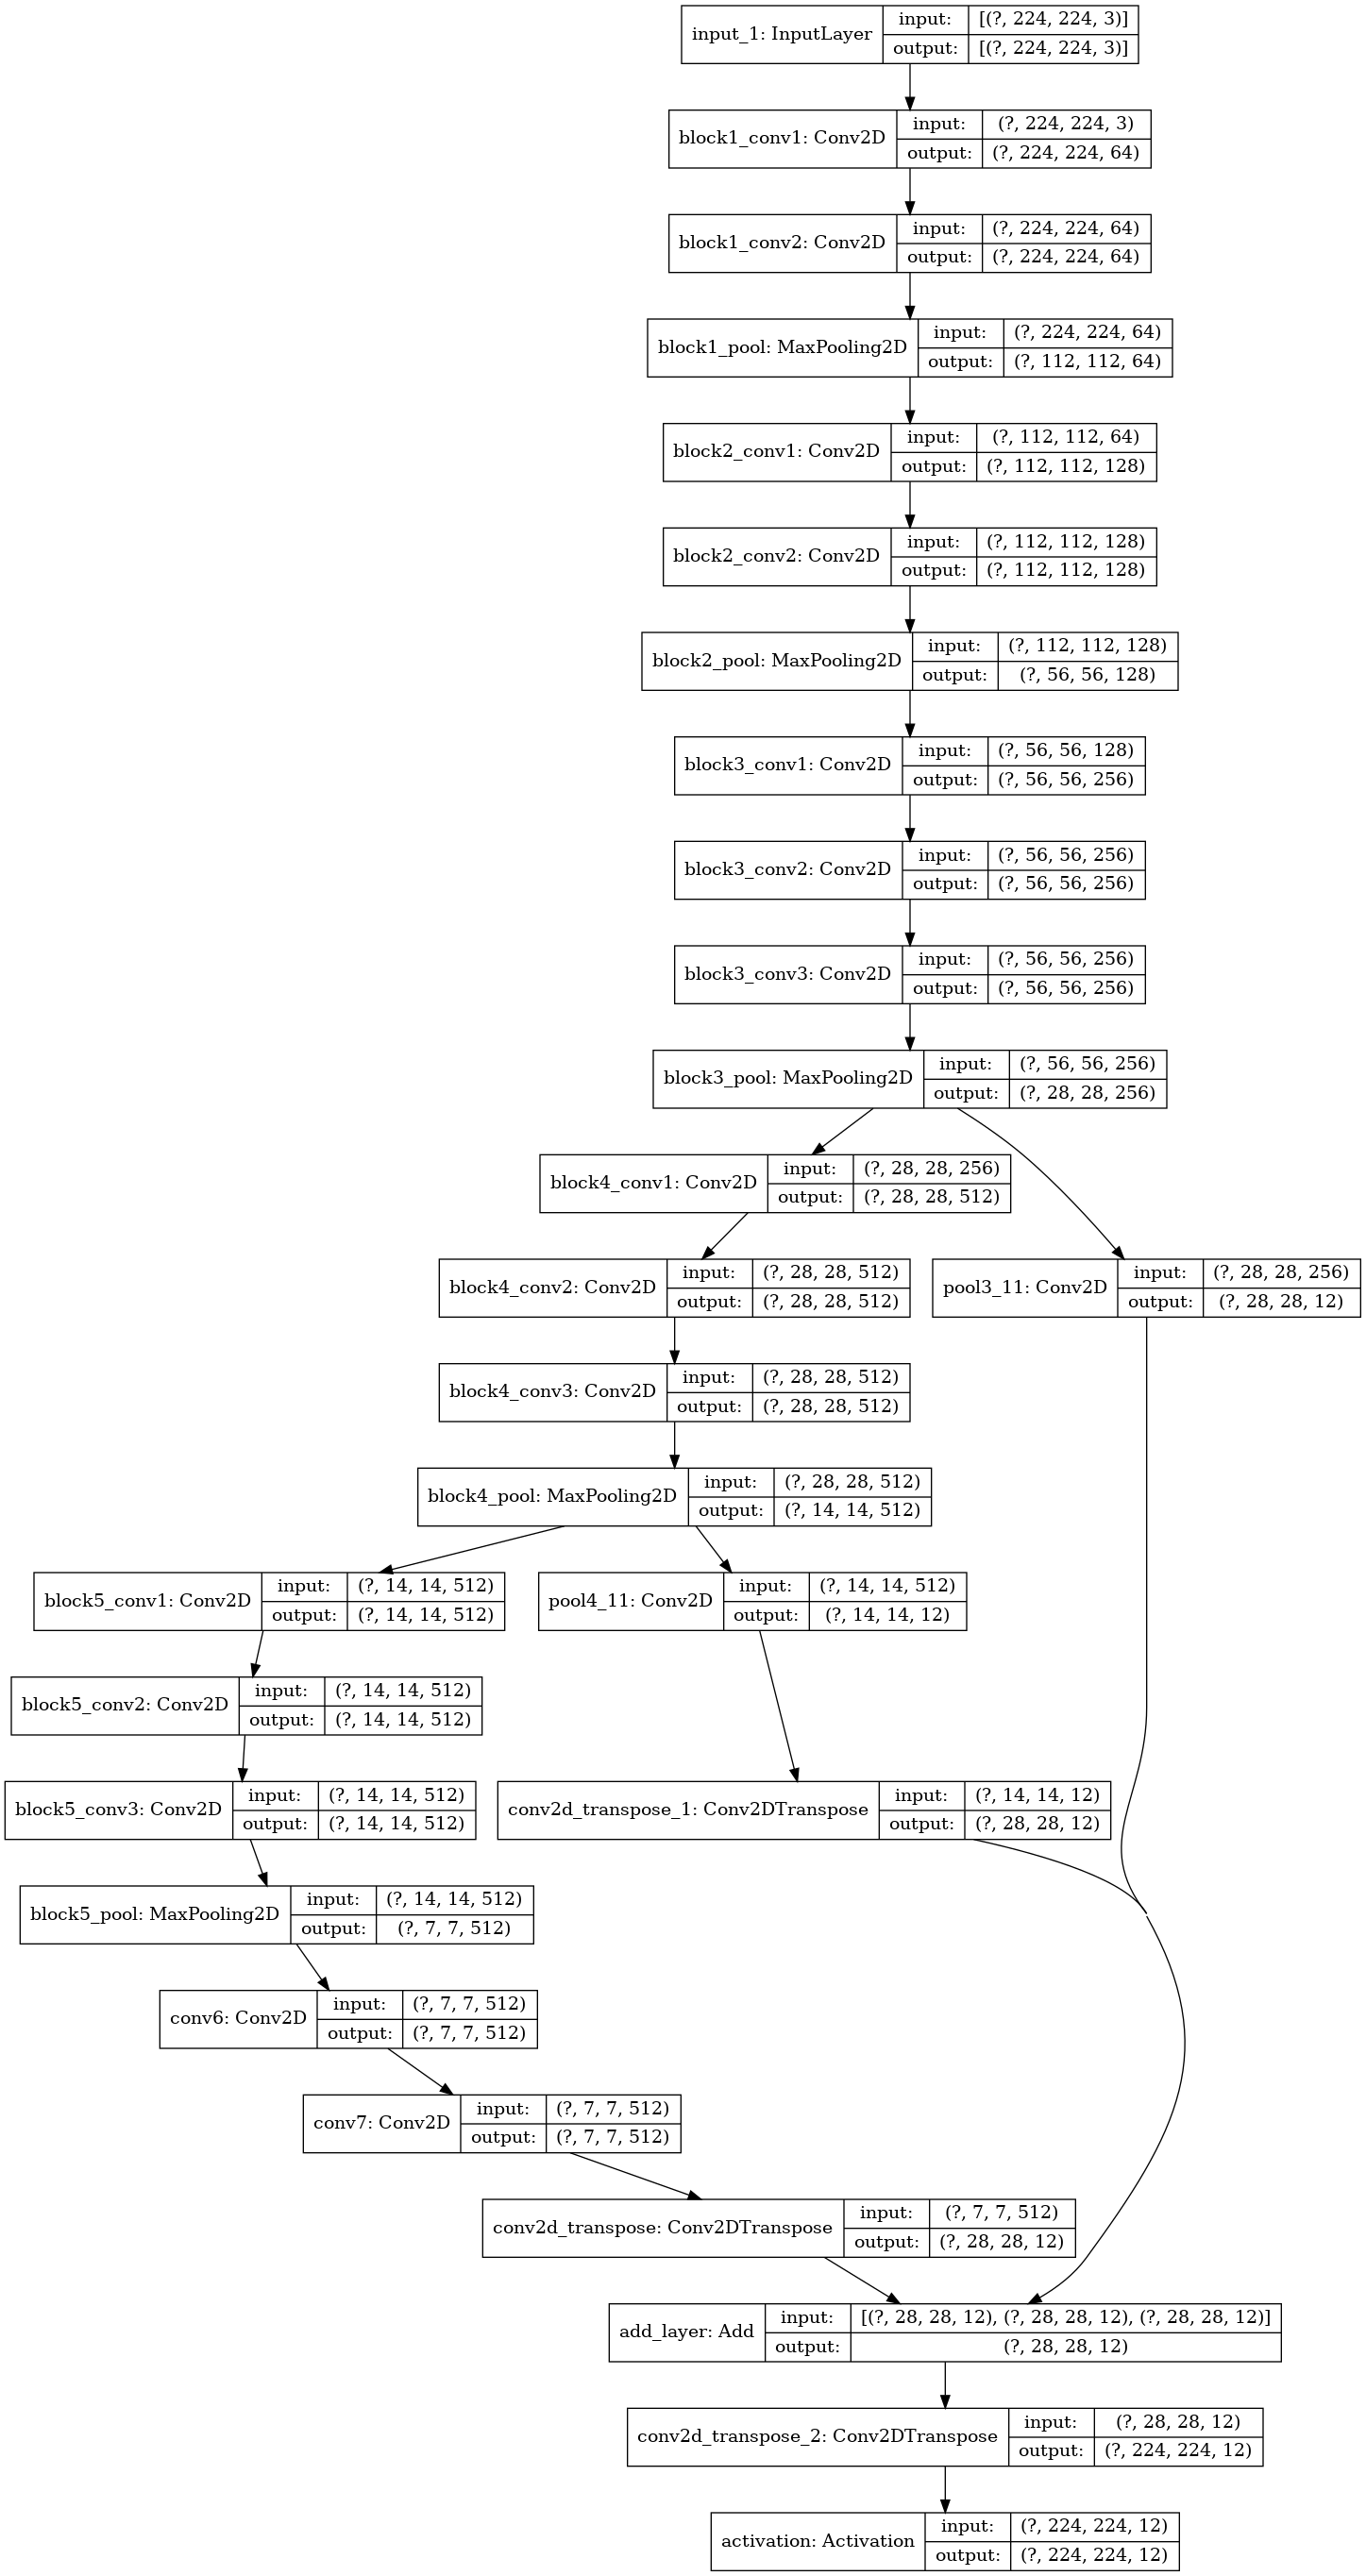

In [ ]:
# Function of generating Block contains several Conv layers followed by Max pooling layer
def Convblock(input, channel_dimension, block_no, no_of_convs, data_form) :
    IMAGE_ORDERING = data_form
    y = input
    for i in range(no_of_convs) :
        Conv_name = "Block"+str(block_no)+"_Conv"+str(i+1)
        # convolution layer with 3*3 kernel
        y = Conv2D(channel_dimension, kernel_size = (3,3), activation='relu', padding = "same", name = Conv_name, data_format=IMAGE_ORDERING)(y)
    
    Max_pooling_name = "Block"+str(block_no)+"_pool"
    
    #Addding max pooling layer
    y = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name = Max_pooling_name, data_format=IMAGE_ORDERING)(y)
    
    return y

In [ ]:
def FCN8( nClasses ,  input_height=224, input_width=224):
    ## input_height and width must be devisible by 32 because maxpooling with filter size = (2,2) is operated 5 times,
    ## which makes the input_height and width 2^5 = 32 times smaller
    assert input_height%32 == 0
    assert input_width%32 == 0
    IMAGE_ORDERING =  "channels_last" 

    img_input = Input(shape=(input_height,input_width, 3)) ## Assume 224,224,3
    
    # Block 1 - 1st Convolutional layer with pool
    f1 = Convblock(input=img_input, channel_dimension=64, block_no=1, no_of_convs=2, data_form=IMAGE_ORDERING)

    # Block 2 - 2nd Convolutional layer with pool
    f2 = Convblock(input=f1, channel_dimension=128, block_no=2, no_of_convs=2, data_form=IMAGE_ORDERING)

    # Block 3 - 3rd Convolutional layer with pool (save a copy for fusing upsampling)
    pool3 = Convblock(input=f2, channel_dimension=256, block_no=3, no_of_convs=3, data_form=IMAGE_ORDERING)

    # Block 4 - 4th Convolutional layer with pool (save a copy for fusing upsampling)
    pool4 = Convblock(input=pool3, channel_dimension=512, block_no=4, no_of_convs=3, data_form=IMAGE_ORDERING)

    # Block 5 - 5th Convolutional layer with pool (save a copy for fusing upsampling)
    pool5 = Convblock(input=pool4, channel_dimension=512, block_no=5, no_of_convs=3, data_form=IMAGE_ORDERING)

    # Set up VGG for the encoder parts of FCN8
    n = 4096
    vgg = Model(img_input, pool5)
    vgg.load_weights(VGG_Weights_path)

    # Conv6 - 7: (FCN-32s) and (2x upsampled prediction based on block 5). 
    o = (Conv2D( n , ( 7 , 7 ) , activation='relu' , padding='same', name="conv6", data_format=IMAGE_ORDERING))(pool5)
    conv7 = ( Conv2D( n , ( 1 , 1 ) , activation='relu' , padding='same', name="conv7", data_format=IMAGE_ORDERING))(o)
    
    ## 4 times upsampling for cov7: (FCN-32s) and (2x upsampled prediction based on block 5). 
    conv7_4 = Conv2DTranspose( nClasses , kernel_size=(4,4) ,  strides=(4,4) , use_bias=False, data_format=IMAGE_ORDERING )(conv7)
    
    ## 2 times upsampling for pool3 and 4
    pool411 = ( Conv2D( nClasses , ( 1 , 1 ) , activation='relu' , padding='same', name="pool4_11", data_format=IMAGE_ORDERING))(pool4)
    pool411_2 = (Conv2DTranspose( nClasses , kernel_size=(2,2) ,  strides=(2,2) , use_bias=False, data_format=IMAGE_ORDERING ))(pool411)

    #combine the upsampling and softmax
    pool311 = ( Conv2D( nClasses , ( 1 , 1 ) , activation='relu' , padding='same', name="pool3_11", data_format=IMAGE_ORDERING))(pool3)     
    o = Add(name="add")([pool411_2, pool311, conv7_4 ])
    o = Conv2DTranspose( nClasses , kernel_size=(8,8) ,  strides=(8,8) , use_bias=False, data_format=IMAGE_ORDERING )(o)
    o = (Activation('softmax'))(o)
    
    # create model and load weight
    model = Model(img_input, o)

    return model

model = FCN8(nClasses     = n_classes,  
             input_height = 224, 
             input_width  = 224)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Block1_Conv1 (Conv2D)          (None, 224, 224, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 Block1_Conv2 (Conv2D)          (None, 224, 224, 64  36928       ['Block1_Conv1[0][0]']           
                                )                                                           

Split between training and testing data

In [ ]:
from sklearn.utils import shuffle
train_rate = 0.85
index_train = np.random.choice(X.shape[0],int(X.shape[0]*train_rate),replace=False)
index_test  = list(set(range(X.shape[0])) - set(index_train))
                            
X, Y = shuffle(X,Y)
X_train, y_train = X[index_train],Y[index_train]
X_test, y_test = X[index_test],Y[index_test]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(311, 224, 224, 3) (311, 224, 224, 12)
(56, 224, 224, 3) (56, 224, 224, 12)


In [ ]:
from keras import optimizers

# Training data
# sgd = optimizers.SGD(lr=1E-2, decay=5**(-4), momentum=0.9, nesterov=True)
sgd = optimizers.gradient_descent_v2.SGD(lr=1E-2, decay=5**(-4), momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

hist1 = model.fit(X_train,y_train,
                  validation_data=(X_test,y_test),
                  batch_size=32,epochs=100,verbose=2)

Train on 311 samples, validate on 56 samples
Epoch 1/100
311/311 - 6s - loss: 2.4373 - acc: 0.1383 - val_loss: 2.4083 - val_acc: 0.1572 - 6s/epoch - 20ms/sample
Epoch 2/100
311/311 - 6s - loss: 2.3520 - acc: 0.1807 - val_loss: 2.4074 - val_acc: 0.1730 - 6s/epoch - 19ms/sample
Epoch 3/100
311/311 - 6s - loss: 2.4365 - acc: 0.1814 - val_loss: 2.3734 - val_acc: 0.2514 - 6s/epoch - 19ms/sample
Epoch 4/100
311/311 - 6s - loss: 2.2883 - acc: 0.2966 - val_loss: 2.4340 - val_acc: 0.2296 - 6s/epoch - 19ms/sample
Epoch 5/100
311/311 - 6s - loss: 2.3180 - acc: 0.2582 - val_loss: 2.0827 - val_acc: 0.3367 - 6s/epoch - 19ms/sample
Epoch 6/100
311/311 - 6s - loss: 1.9629 - acc: 0.3948 - val_loss: 1.8679 - val_acc: 0.4659 - 6s/epoch - 19ms/sample
Epoch 7/100
311/311 - 6s - loss: 1.7098 - acc: 0.4979 - val_loss: 1.5771 - val_acc: 0.5261 - 6s/epoch - 19ms/sample
Epoch 8/100
311/311 - 6s - loss: 1.4940 - acc: 0.5488 - val_loss: 1.3836 - val_acc: 0.5507 - 6s/epoch - 20ms/sample
Epoch 9/100
311/311 - 6s - 

**About the results:**
I tried to train the model with 66 epoch and got 0.7032 accuracy. However, it took forever to train the model. 

**What I learnt:**
1. Reviewed some basic knowledges like SGD, mini-batch, camparisons between relu, signoid and tanh. 
2. Upsampling (several kinds of upsampling: nearest neighbor approach, Shift and stitch, deconvolution utilizing VGG).
3. Build a simple FCN8 model using keras with clear structure.
4. Better understanding about Semantic segmentation.


**Questions:**
1. Better way to improve the training efficiency. (like mini-batch)
2. Still feel comfusing about Shift and stitch upsampling.


**Future steps:**
2. Test on Mean Intersection over Union(mIOU).

# Plot accuracy and value accuracy vs epoch:

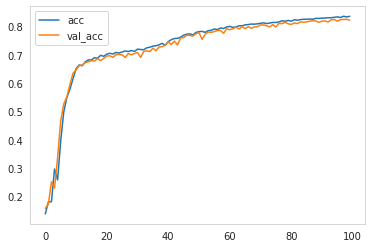

In [ ]:
plt.plot(hist1.history['acc'],label='acc')
plt.plot(hist1.history['val_acc'],label='val_acc')
plt.legend()
plt.show()

In [ ]:
from keras import optimizers

# Training data
# sgd = optimizers.SGD(lr=1E-2, decay=5**(-4), momentum=0.9, nesterov=True)
sgd = optimizers.gradient_descent_v2.SGD(lr=1E-2, decay=5**(-4), momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

hist1 = model.fit(X_train,y_train,
                  validation_data=(X_test,y_test),
                  batch_size=32,epochs=188,verbose=2)

Train on 311 samples, validate on 56 samples
Epoch 1/188
311/311 - 6s - loss: 1.4327 - acc: 0.5806 - val_loss: 1.4619 - val_acc: 0.6181 - 6s/epoch - 20ms/sample
Epoch 2/188
311/311 - 6s - loss: 1.1418 - acc: 0.6558 - val_loss: 1.0414 - val_acc: 0.6638 - 6s/epoch - 19ms/sample
Epoch 3/188
311/311 - 6s - loss: 1.0109 - acc: 0.6900 - val_loss: 0.9137 - val_acc: 0.7049 - 6s/epoch - 19ms/sample
Epoch 4/188
311/311 - 6s - loss: 0.8779 - acc: 0.7248 - val_loss: 0.8782 - val_acc: 0.7142 - 6s/epoch - 19ms/sample
Epoch 5/188
311/311 - 6s - loss: 0.8556 - acc: 0.7262 - val_loss: 0.8174 - val_acc: 0.7474 - 6s/epoch - 19ms/sample
Epoch 6/188
311/311 - 6s - loss: 0.7997 - acc: 0.7561 - val_loss: 0.7882 - val_acc: 0.7542 - 6s/epoch - 19ms/sample
Epoch 7/188
311/311 - 6s - loss: 0.7738 - acc: 0.7674 - val_loss: 0.7639 - val_acc: 0.7650 - 6s/epoch - 19ms/sample
Epoch 8/188
311/311 - 6s - loss: 0.7632 - acc: 0.7714 - val_loss: 0.7869 - val_acc: 0.7611 - 6s/epoch - 19ms/sample
Epoch 9/188
311/311 - 6s - 

# Plot accuracy and value accuracy vs epoch:

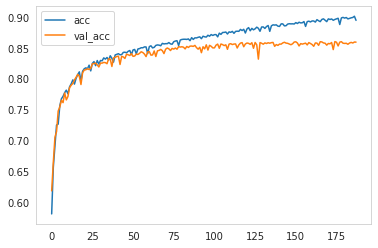

In [ ]:
plt.plot(hist1.history['acc'],label='acc')
plt.plot(hist1.history['val_acc'],label='val_acc')
plt.legend()
plt.show()

# Test on GRAZ_01 Dataset
## 1. Get and reshape the test images
## (2. Intersection over union (IoU) for each segmentation class) (not in this dataset)
## 3. Visualization

In [ ]:

# !unzip '/content/drive/My Drive/bikes_and_persons.zip' -d '/content/drive/MyDrive/FCN8model'

## 1. Get and reshape the input test images

In [ ]:
# enter your path here
dir_img = "/content/drive/MyDrive/FCN8model/bikes_and_persons"  # images for testing

# Read the images
images = os.listdir(dir_img)
images.sort()

# Reshape them into 224*224
X_test = []
for im in images:
    X_test.append( getImageArr(dir_img +"/"+ im , 224 , 224 )  )

X_test = np.array(X_test)
print(X_test.shape)

(210, 224, 224, 3)


## 3. Visualization

In [ ]:
# Apply the model to do the validation test
y_pred = model.predict(X_test)
y_predi = np.argmax(y_pred, axis=3)
img_is  = (X_test[i] + 1)*(255.0/2)
print(img_is.shape,y_predi.shape)


(224, 224, 3) (210, 224, 224)


In [ ]:
def give_color_to_seg_img(seg,n_classes):
  '''
  seg : size is (input_width,input_height,3)
  assign color to each class 
      You can use sns color palette to assign color pattern
      colors = sns.color_palette("hls", n_classes)
  '''
  # Choose a color palette
  colors = sns.color_palette("hls", n_classes)
  # Set up a blank array for colored image
  seg_imageRGB = np.zeros( (seg.shape[0],seg.shape[1],3) ).astype('float')

  # Assign 12 colors
  for i in range(n_classes):
      seg_imageRGB[:,:,0][seg == i] = colors[i][0]
      seg_imageRGB[:,:,1][seg == i] = colors[i][1]
      seg_imageRGB[:,:,2][seg == i] = colors[i][2]

  seg_img = seg_imageRGB
  return(seg_img)

(224, 224)


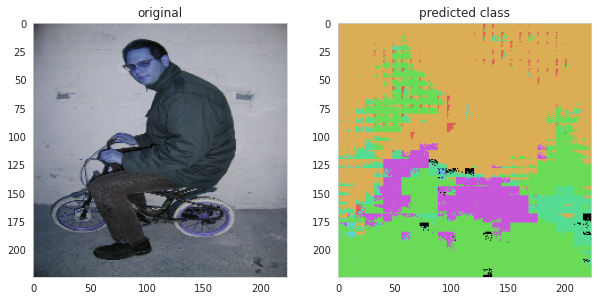

(224, 224)


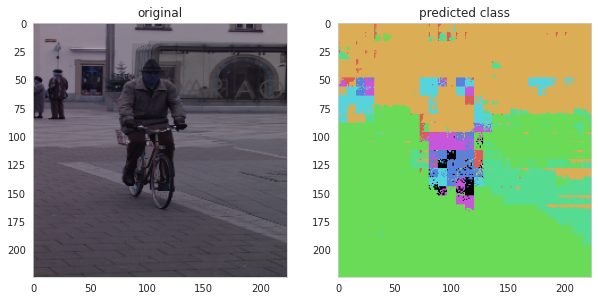

(224, 224)


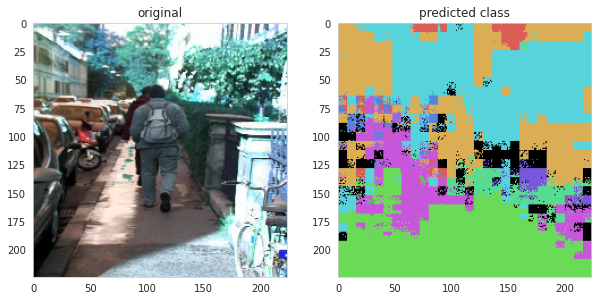

(224, 224)


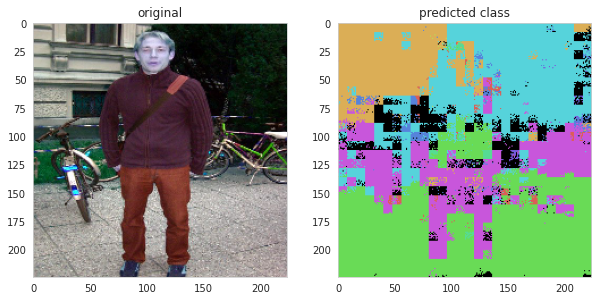

(224, 224)


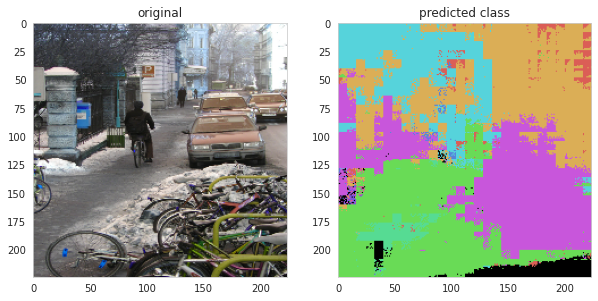

(224, 224)


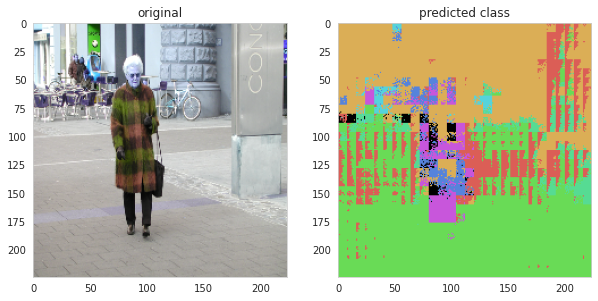

(224, 224)


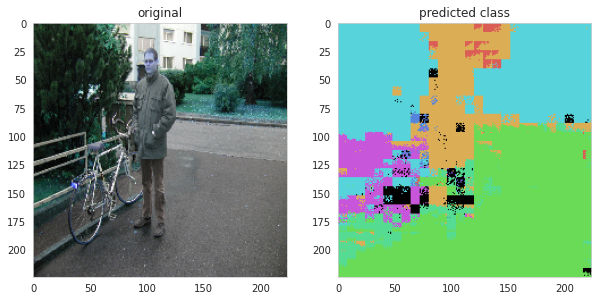

(224, 224)


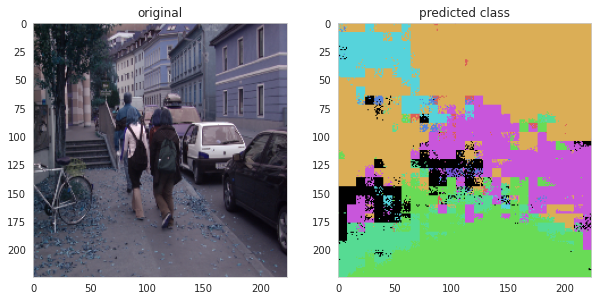

(224, 224)


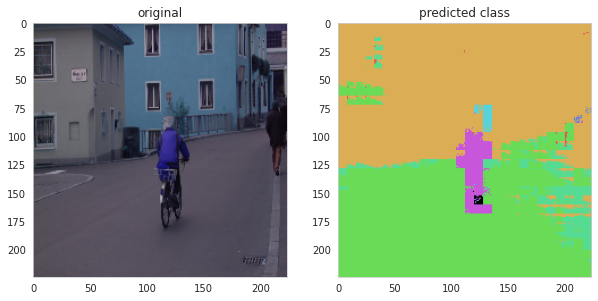

(224, 224)


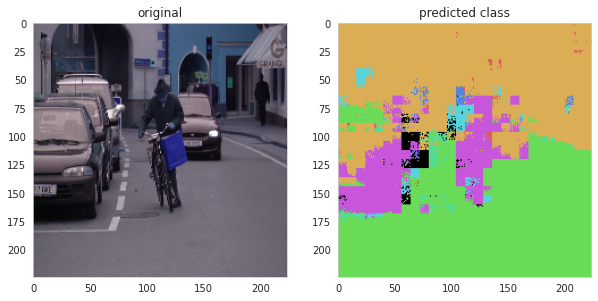

In [ ]:
shape = (224,224)
n_classes= 10

for i in range(10):
    img_is  = (X_test[i] + 1)*(255.0/2)
    seg = y_predi[i]
    print(seg.shape)

    fig = plt.figure(figsize=(10,30))    
    ax = fig.add_subplot(1,2,1)
    ax.imshow(img_is/255.0)
    ax.set_title("original")
    
    ax = fig.add_subplot(1,2,2)
    ax.imshow(give_color_to_seg_img(seg,n_classes))
    ax.set_title("predicted class")
    
    plt.show()
